In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import set_option
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings("ignore")

In [27]:
data = pd.read_csv('D:/OneCampus/Database/Database/Datasets-master (1)/Datasets-master/adult-all.csv', na_values='?') # using to replace all missing values from '?' to NaN
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'earnings']
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,earnings
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [28]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,48841.0,NaN,NaN,NaN,38.643578,13.71065,17.0,28.0,37.0,48.0,90.0
workclass,46042,8,Private,33906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,48841.0,NaN,NaN,NaN,189666.430786,105603.887256,12285.0,117555.0,178147.0,237646.0,1490400.0
education,48841,16,HS-grad,15784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_num,48841.0,NaN,NaN,NaN,10.078029,2.570965,1.0,9.0,10.0,12.0,16.0
marital_status,48841,7,Married-civ-spouse,22379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,46032,14,Prof-specialty,6172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,48841,6,Husband,19716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,48841,5,White,41761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,48841,2,Male,32649,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48841 non-null  int64 
 1   workclass       46042 non-null  object
 2   fnlwgt          48841 non-null  int64 
 3   education       48841 non-null  object
 4   education_num   48841 non-null  int64 
 5   marital_status  48841 non-null  object
 6   occupation      46032 non-null  object
 7   relationship    48841 non-null  object
 8   race            48841 non-null  object
 9   sex             48841 non-null  object
 10  capital_gain    48841 non-null  int64 
 11  capital_loss    48841 non-null  int64 
 12  hours_per_week  48841 non-null  int64 
 13  native_country  47984 non-null  object
 14  earnings        48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [30]:
data.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
earnings             0
dtype: int64

In [31]:
# droping rows with missing values
adult= data.dropna()

In [32]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45221 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45221 non-null  int64 
 1   workclass       45221 non-null  object
 2   fnlwgt          45221 non-null  int64 
 3   education       45221 non-null  object
 4   education_num   45221 non-null  int64 
 5   marital_status  45221 non-null  object
 6   occupation      45221 non-null  object
 7   relationship    45221 non-null  object
 8   race            45221 non-null  object
 9   sex             45221 non-null  object
 10  capital_gain    45221 non-null  int64 
 11  capital_loss    45221 non-null  int64 
 12  hours_per_week  45221 non-null  int64 
 13  native_country  45221 non-null  object
 14  earnings        45221 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


# Analysing the data of each feature on the data

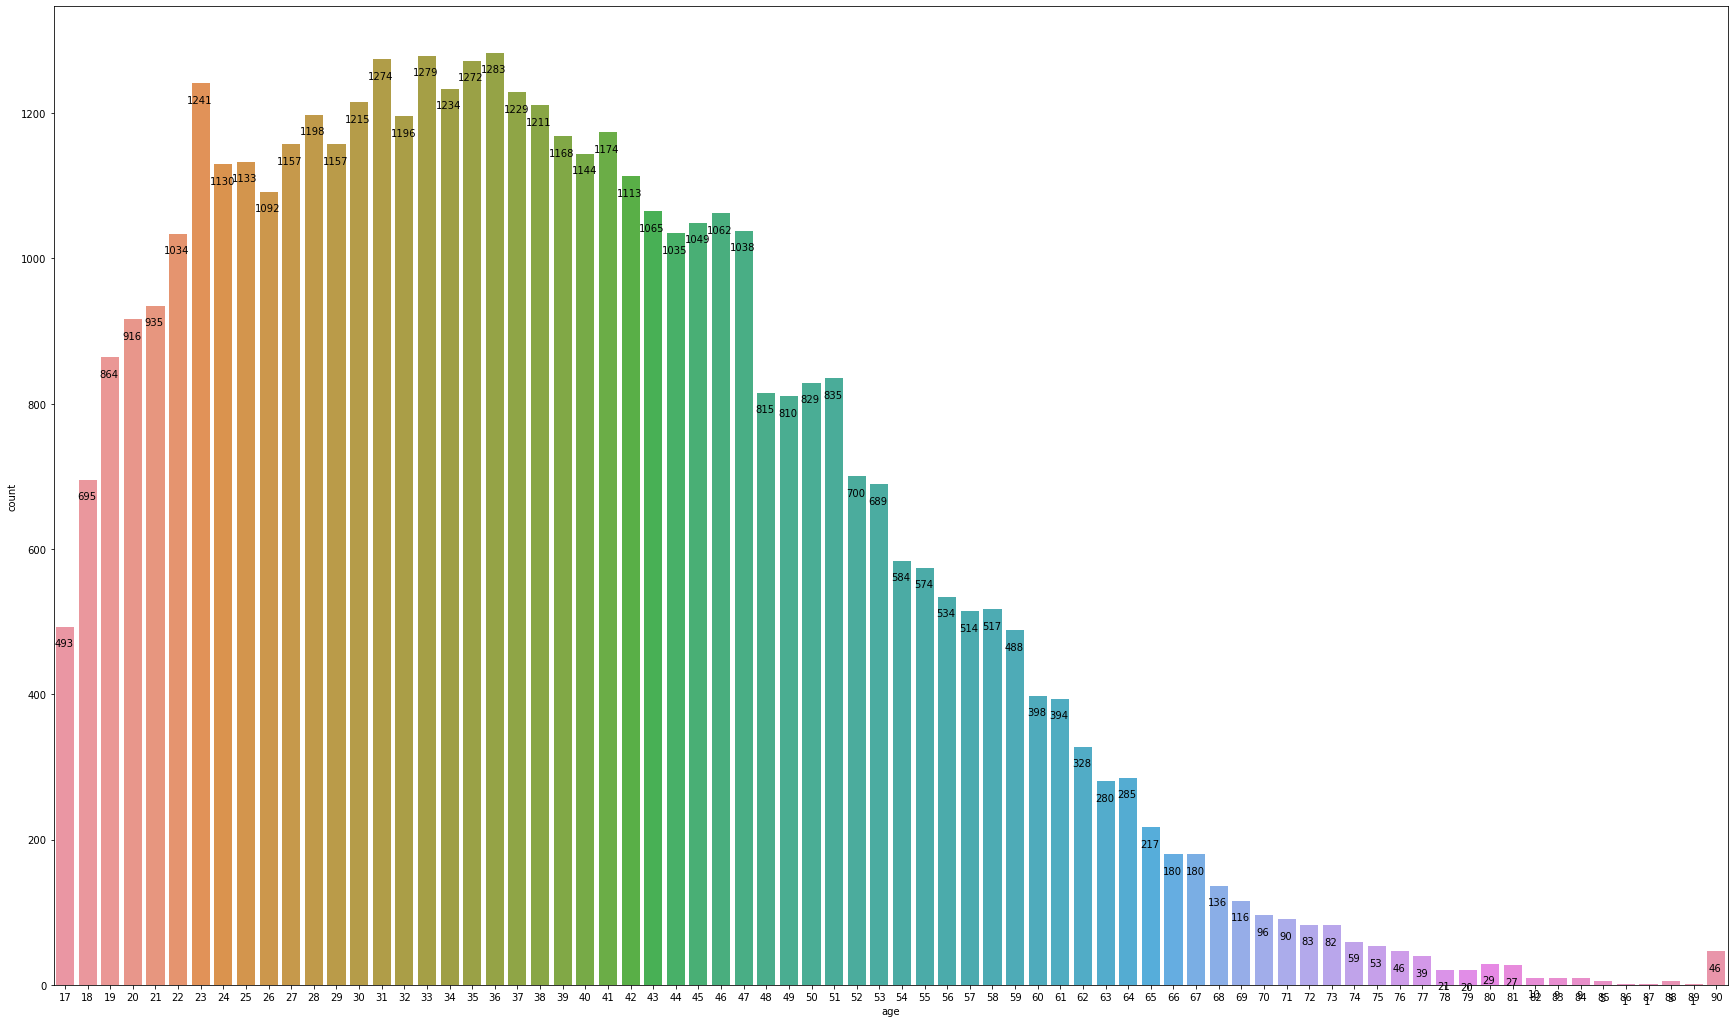

In [33]:
age = sns.countplot(x='age', data=adult)
plt.gcf().set_size_inches(30,18)
for a in age.patches:
    age.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

A good number of people people here are within the age brackets of 17-70 

Private             73.653833
Self-emp-not-inc     8.394330
Local-gov            6.855222
State-gov            4.301099
Self-emp-inc         3.639902
Federal-gov          3.109175
Without-pay          0.046439
Name: workclass, dtype: float64


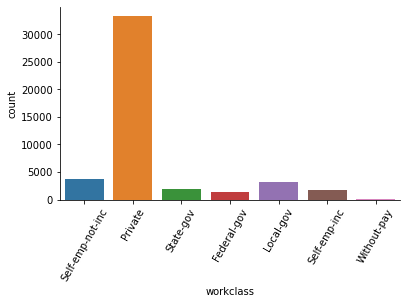

In [55]:
clas = sns.catplot('workclass', data=adult, kind='count', aspect=3)
clas.set_xticklabels(rotation=60)
plt.gcf().set_size_inches(5,3)
print(adult['workclass'].value_counts(normalize=True)*100)

Private workers make up for majority of the people in this data with a 73.65% count

HS-grad         32.690564
Some-college    21.890272
Bachelors       16.737799
Masters          5.559364
Assoc-voc        4.332058
11th             3.580195
Assoc-acdm       3.332523
10th             2.704496
7th-8th          1.819951
Prof-school      1.735919
9th              1.494881
12th             1.275956
Doctorate        1.202981
5th-6th          0.992902
1st-4th          0.490922
Preschool        0.159218
Name: education, dtype: float64


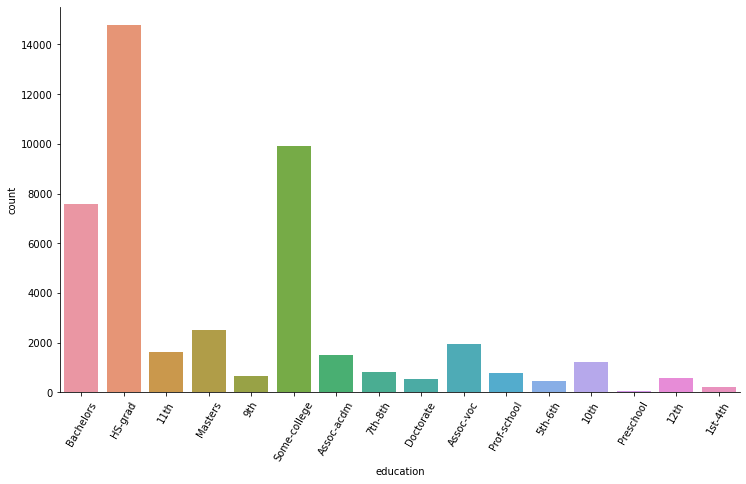

In [60]:
edu = sns.catplot('education', data=adult, kind='count', aspect=3)
edu.set_xticklabels(rotation=60)
plt.gcf().set_size_inches(10,6)
print(adult['education'].value_counts(normalize=True)*100)

A good number of people in this data are high school graduates, college students, or bachelors

9     32.690564
10    21.890272
13    16.737799
14     5.559364
11     4.332058
7      3.580195
12     3.332523
6      2.704496
4      1.819951
15     1.735919
5      1.494881
8      1.275956
16     1.202981
3      0.992902
2      0.490922
1      0.159218
Name: education_num, dtype: float64


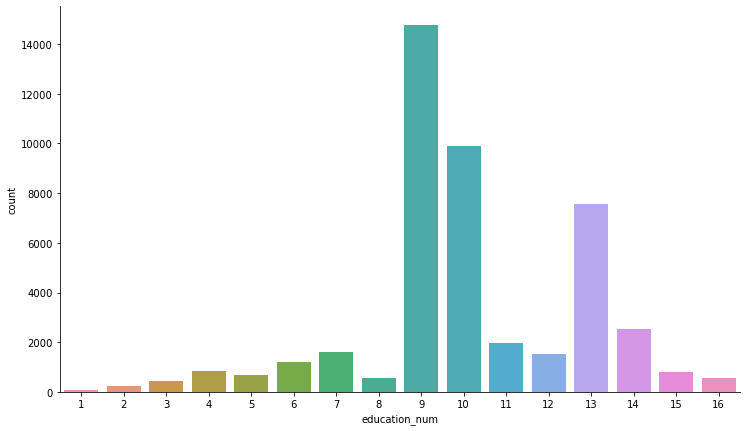

In [62]:
eduNum = sns.catplot('education_num', data=adult, kind='count', aspect=3)
plt.gcf().set_size_inches(10,6)
print(adult['education_num'].value_counts(normalize=True)*100)

A good number of people in this data have passed through education levels of 9, 10, or 13

Married-civ-spouse       46.560226
Never-married            32.279251
Divorced                 13.924946
Separated                 3.120232
Widowed                   2.823909
Married-spouse-absent     1.220672
Married-AF-spouse         0.070764
Name: marital_status, dtype: float64


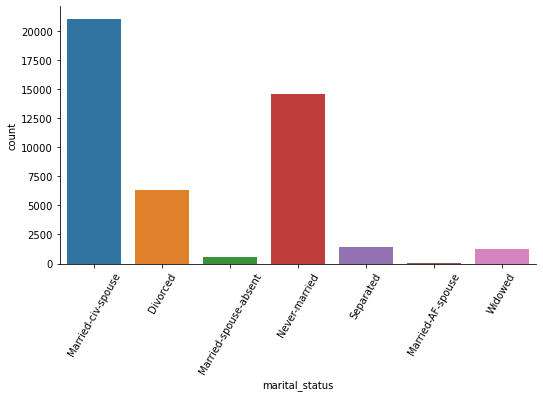

In [67]:
mar = sns.catplot('marital_status', data=adult, kind='count', aspect=3)
mar.set_xticklabels(rotation=60)
plt.gcf().set_size_inches(7,4)
print(adult['marital_status'].value_counts(normalize=True)*100)

A good number of people in this data are either married to a civilian spouse, have never married, or divorced

Craft-repair         13.312399
Prof-specialty       13.285863
Exec-managerial      13.232790
Adm-clerical         12.248734
Sales                11.959046
Other-service        10.632228
Machine-op-inspct     6.567745
Transport-moving      5.121514
Handlers-cleaners     4.524447
Farming-fishing       3.272816
Tech-support          3.140134
Protective-serv       2.158289
Priv-house-serv       0.513036
Armed-Forces          0.030959
Name: occupation, dtype: float64


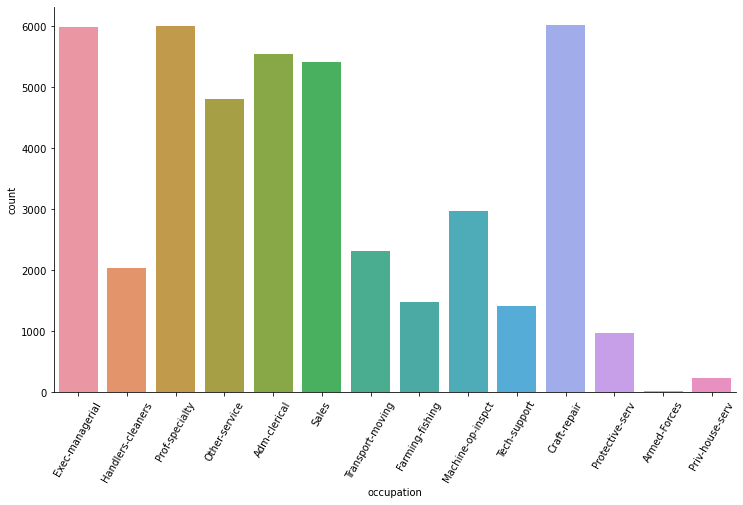

In [69]:
occu = sns.catplot('occupation', data=adult, kind='count', aspect=3)
occu.set_xticklabels(rotation=60)
plt.gcf().set_size_inches(10,6)
print(adult['occupation'].value_counts(normalize=True)*100)

A good number of people in this data are either proffesional specialists, executive managers, Craft repairers, Admin clerks, Sales reps, or involved in other services

Husband           41.277283
Not-in-family     25.875147
Own-child         14.652484
Unmarried         10.588001
Wife               4.623958
Other-relative     2.983127
Name: relationship, dtype: float64


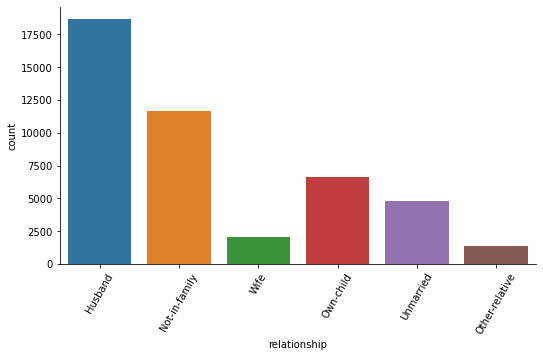

In [72]:
rela = sns.catplot('relationship', data=adult, kind='count', aspect=3)
rela.set_xticklabels(rotation=60)
plt.gcf().set_size_inches(7,4)
print(adult['relationship'].value_counts(normalize=True)*100)

A good number of people in this data are either husbands or not in a family

White                 86.026404
Black                  9.349638
Asian-Pac-Islander     2.881405
Amer-Indian-Eskimo     0.961942
Other                  0.780611
Name: race, dtype: float64


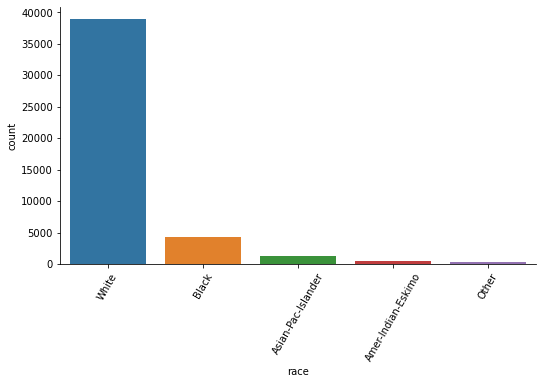

In [73]:
rac = sns.catplot('race', data=adult, kind='count', aspect=3)
rac.set_xticklabels(rotation=60)
plt.gcf().set_size_inches(7,4)
print(adult['race'].value_counts(normalize=True)*100)

Almost all the people in this data are whites

Male      67.504036
Female    32.495964
Name: sex, dtype: float64


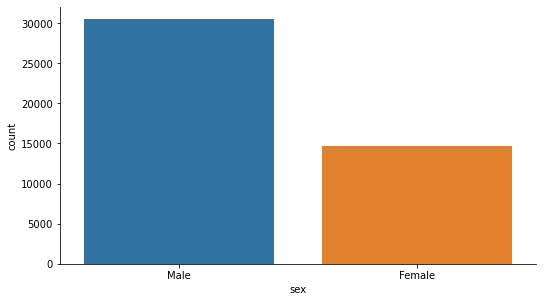

In [75]:
gen = sns.catplot('sex', data=adult, kind='count', aspect=3)
plt.gcf().set_size_inches(7,4)
print(adult['sex'].value_counts(normalize=True)*100)

Most of the people in this data are males

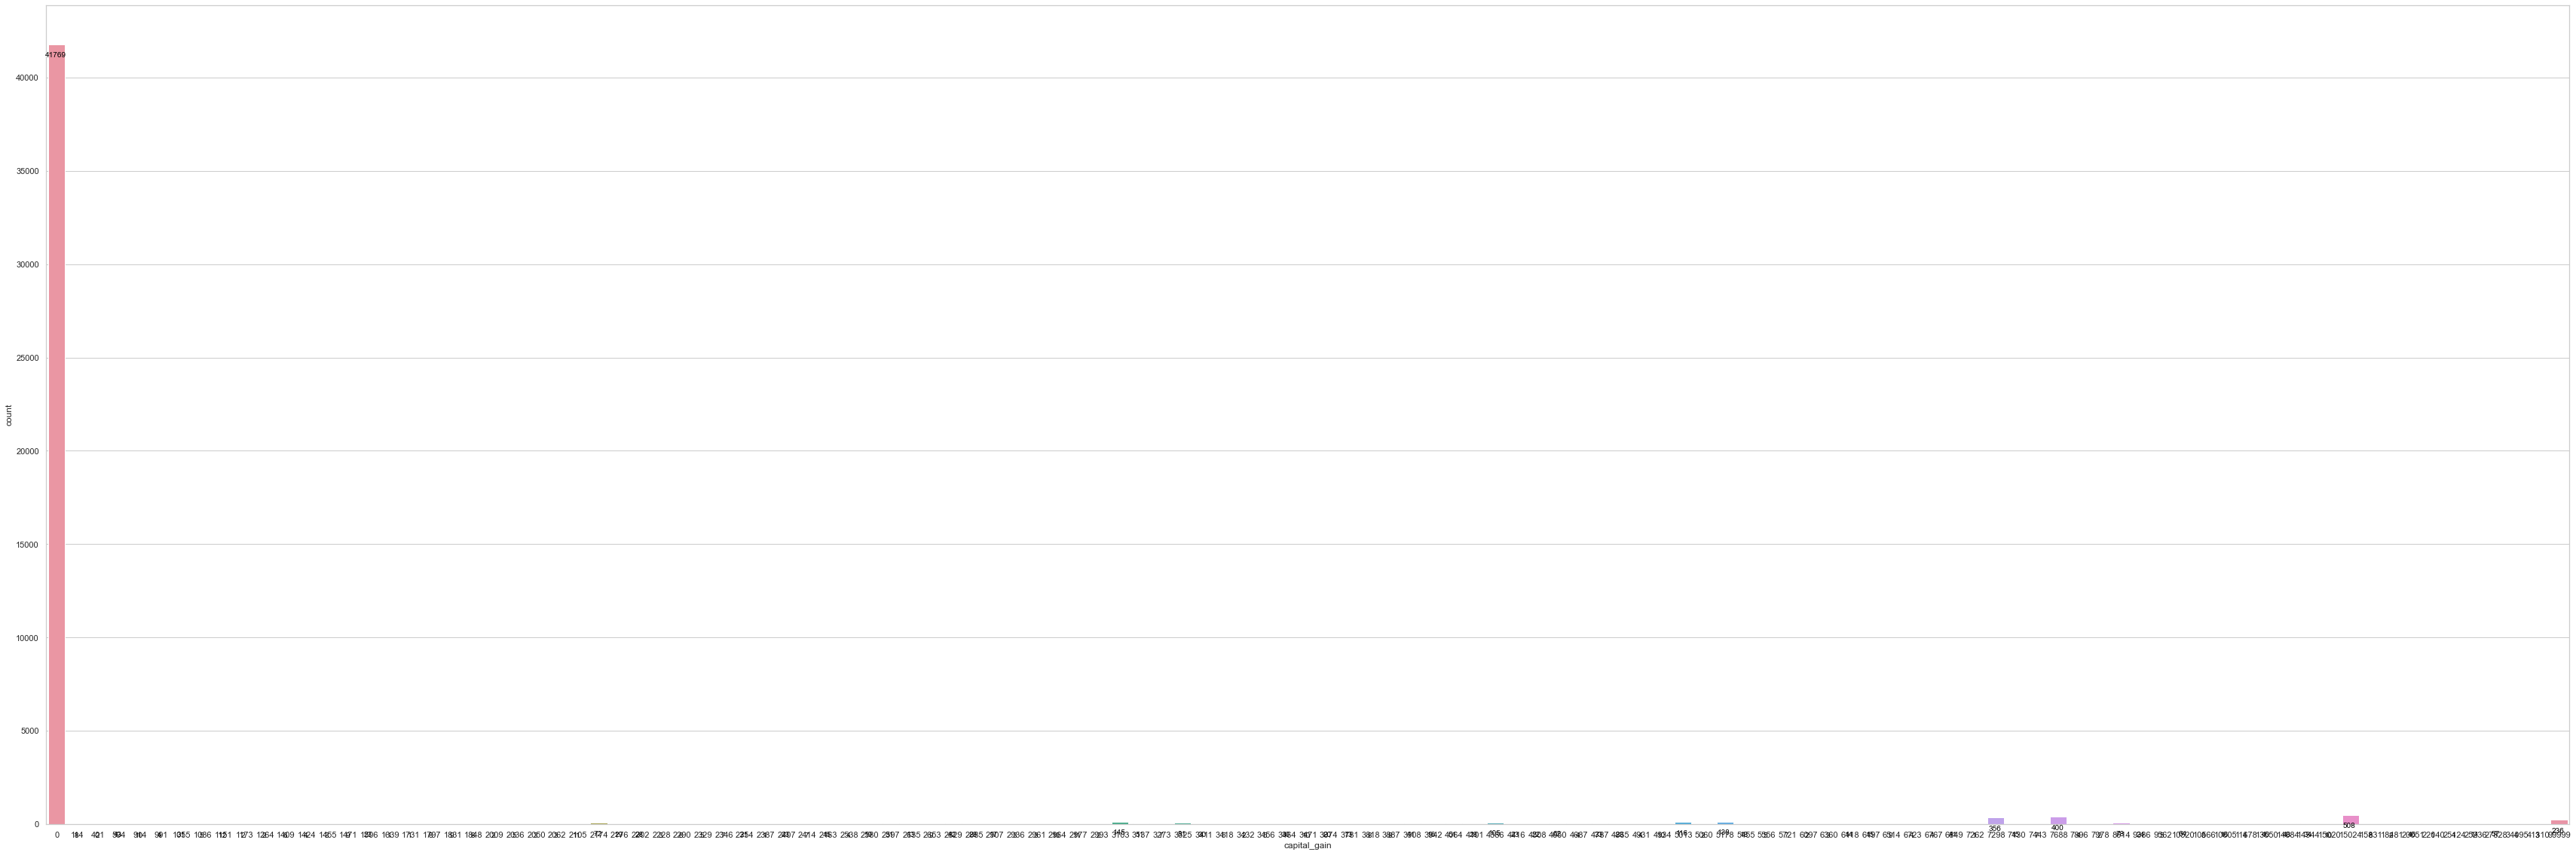

0        91.580609
15024     1.113815
7688      0.877020
7298      0.780548
99999     0.517442
           ...    
7262      0.002193
1731      0.002193
22040     0.002193
2387      0.002193
1639      0.002193
Name: capital_gain, Length: 121, dtype: float64


In [296]:
age = sns.countplot(x='capital_gain', data=adult)
plt.gcf().set_size_inches(60,20)
for a in age.patches:
    age.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()
print(adult8['capital_gain'].value_counts(normalize=True)*100)

- 91.58% of the people in this data make 0 capital gain annually
- 1.11% make a capital gain of 15024
- 0.88% make a capital gain of 7688
- 0.78% make a capital gain of 7298
- 0.52% make a capital gain of 99999

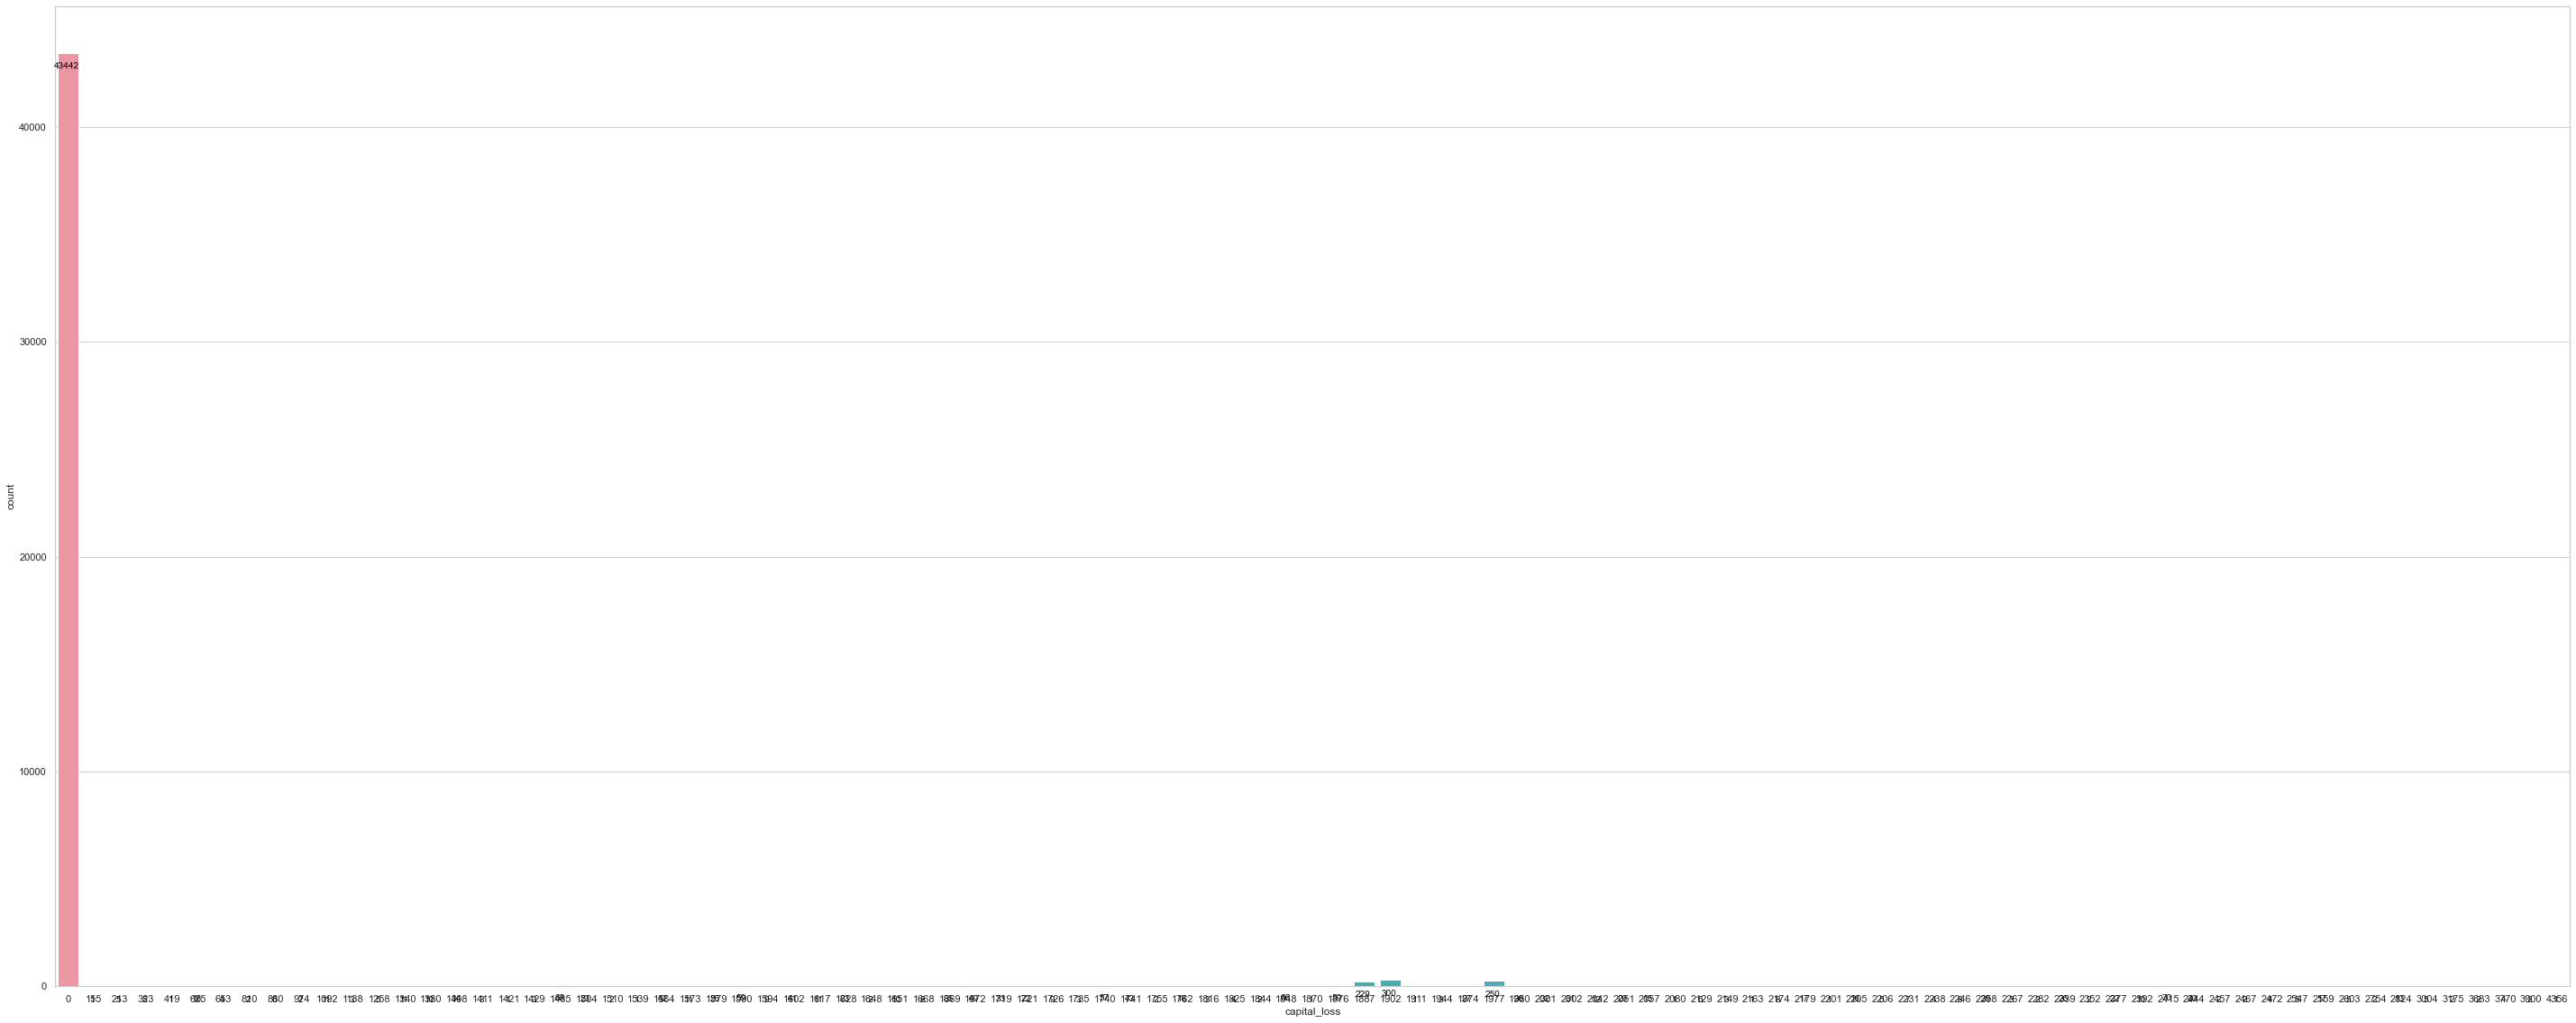

0       95.248745
1902     0.657765
1977     0.548137
1887     0.502094
2415     0.153478
          ...    
2201     0.002193
1911     0.002193
2080     0.002193
419      0.002193
2163     0.002193
Name: capital_loss, Length: 97, dtype: float64


In [297]:
age = sns.countplot(x='capital_loss', data=adult)
plt.gcf().set_size_inches(50,20)
for a in age.patches:
    age.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()
print(adult8['capital_loss'].value_counts(normalize=True)*100)

- 95.25% of the people in this data make 0 capital loss annually
- 0.66% make a capital loss of 1902
- 0.55% make a capital loss of 1977
- 0.50% make a capital loss of 1887
- 0.15% make a capital loss of 2415

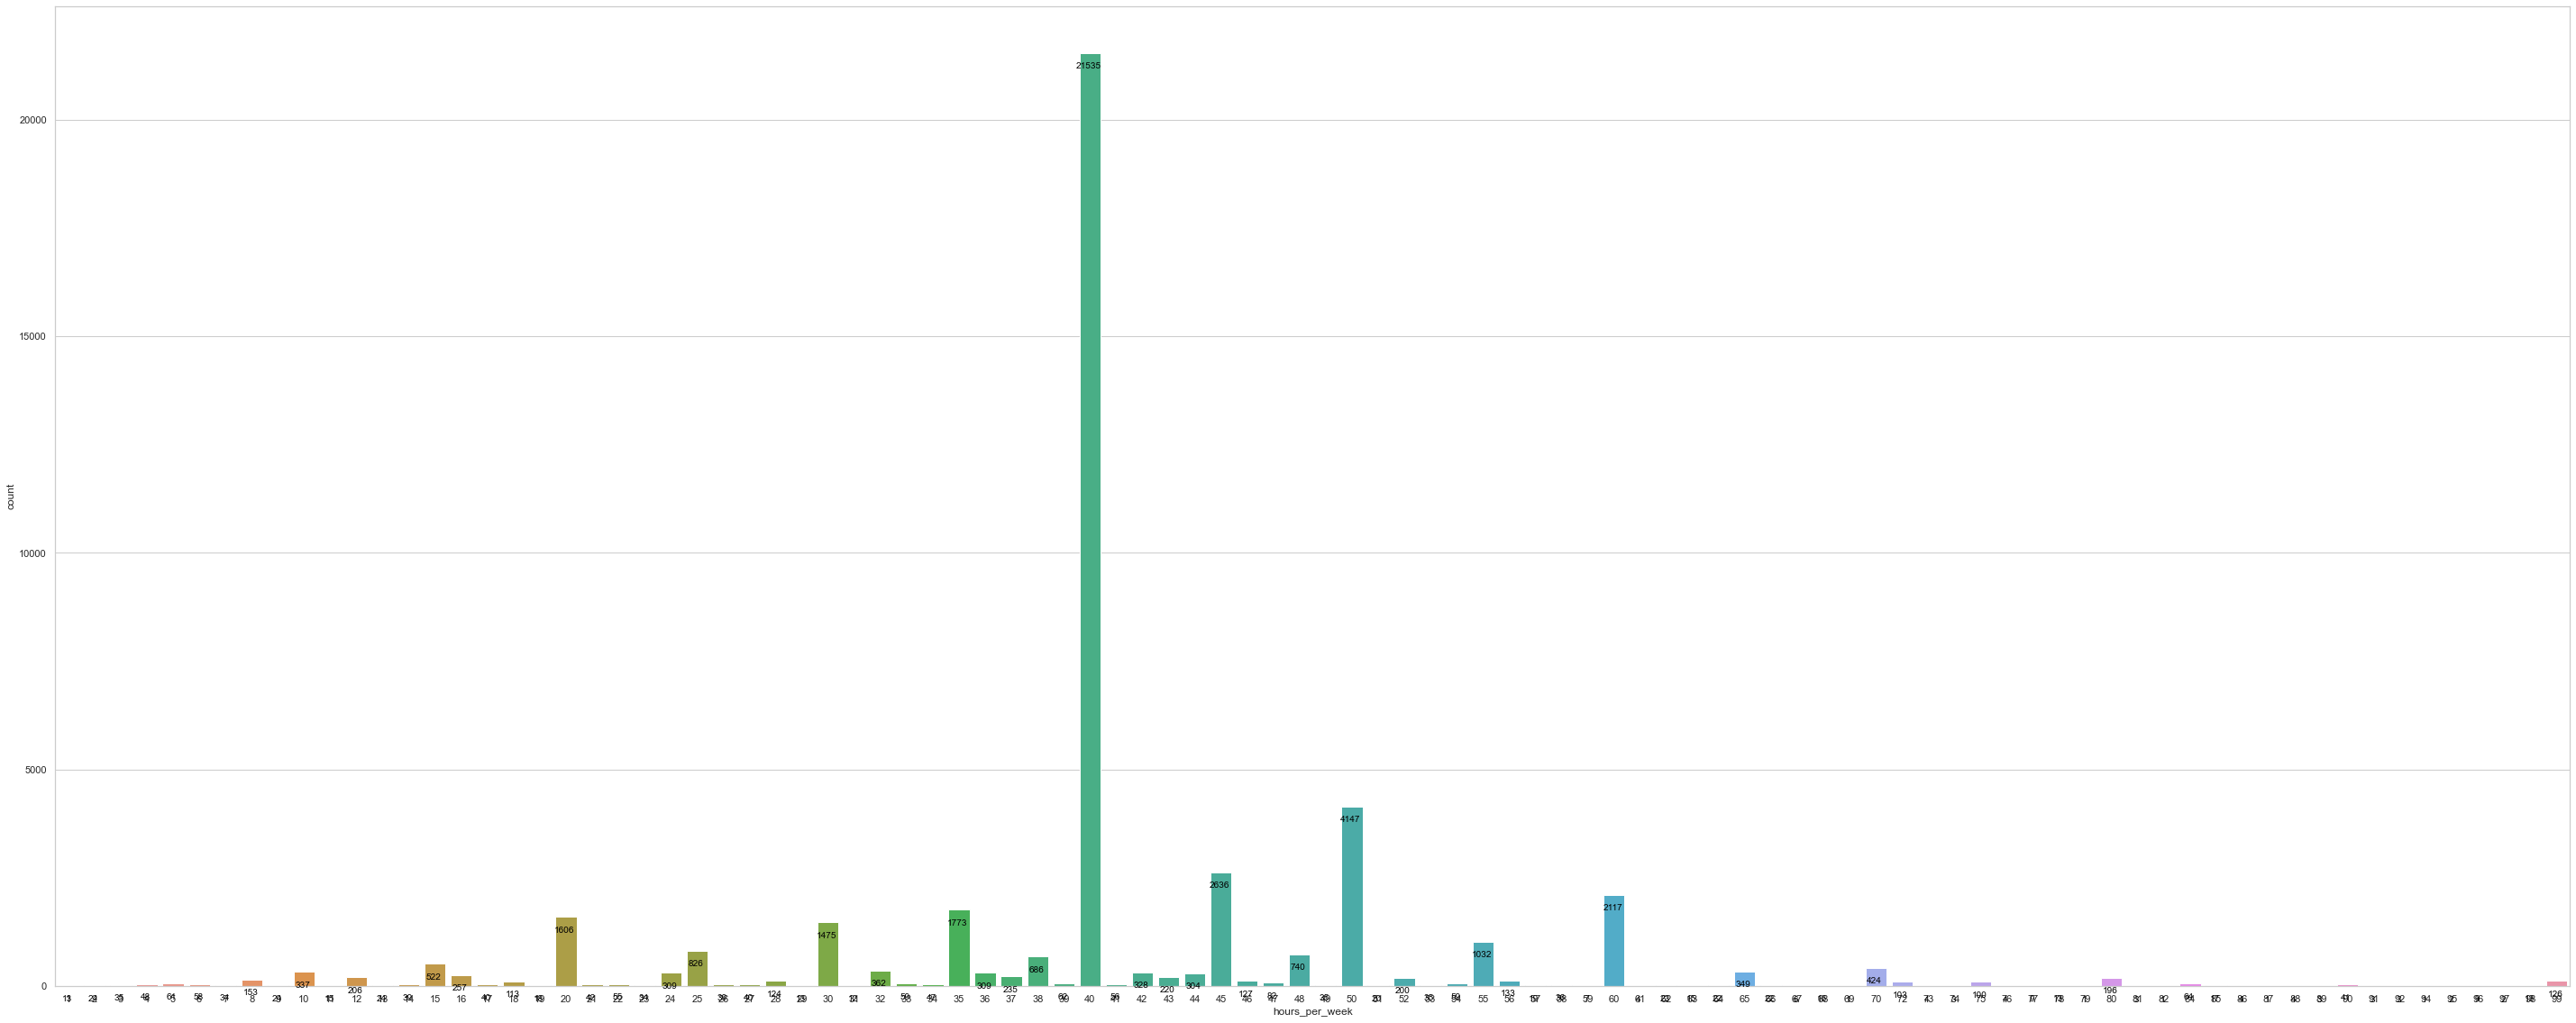

40    47.216558
50     9.092504
45     5.779561
60     4.641628
35     3.887391
        ...    
79     0.002193
69     0.002193
94     0.002193
82     0.002193
87     0.002193
Name: hours_per_week, Length: 96, dtype: float64


In [298]:
age = sns.countplot(x='hours_per_week', data=adult)
plt.gcf().set_size_inches(50,20)
for a in age.patches:
    age.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()
print(adult8['hours_per_week'].value_counts(normalize=True)*100)

- 47.21% of the people in this data work for 40 hours per week
- 9.09% work for 40 hours per week
- 5.78% work for 50 hours per week
- 4.64% work for 45 hours per week
- 3.89% work for 60 hours per week

<=50K    75.215055
>50K     24.784945
Name: earnings, dtype: float64


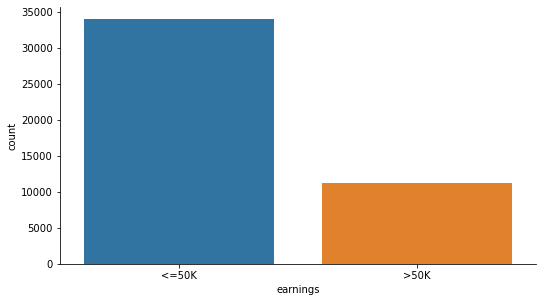

In [76]:
earn = sns.catplot('earnings', data=adult, kind='count', aspect=3)
plt.gcf().set_size_inches(7,4)
print(adult['earnings'].value_counts(normalize=True)*100)

Most of the people in this data do not earn above 50k annually

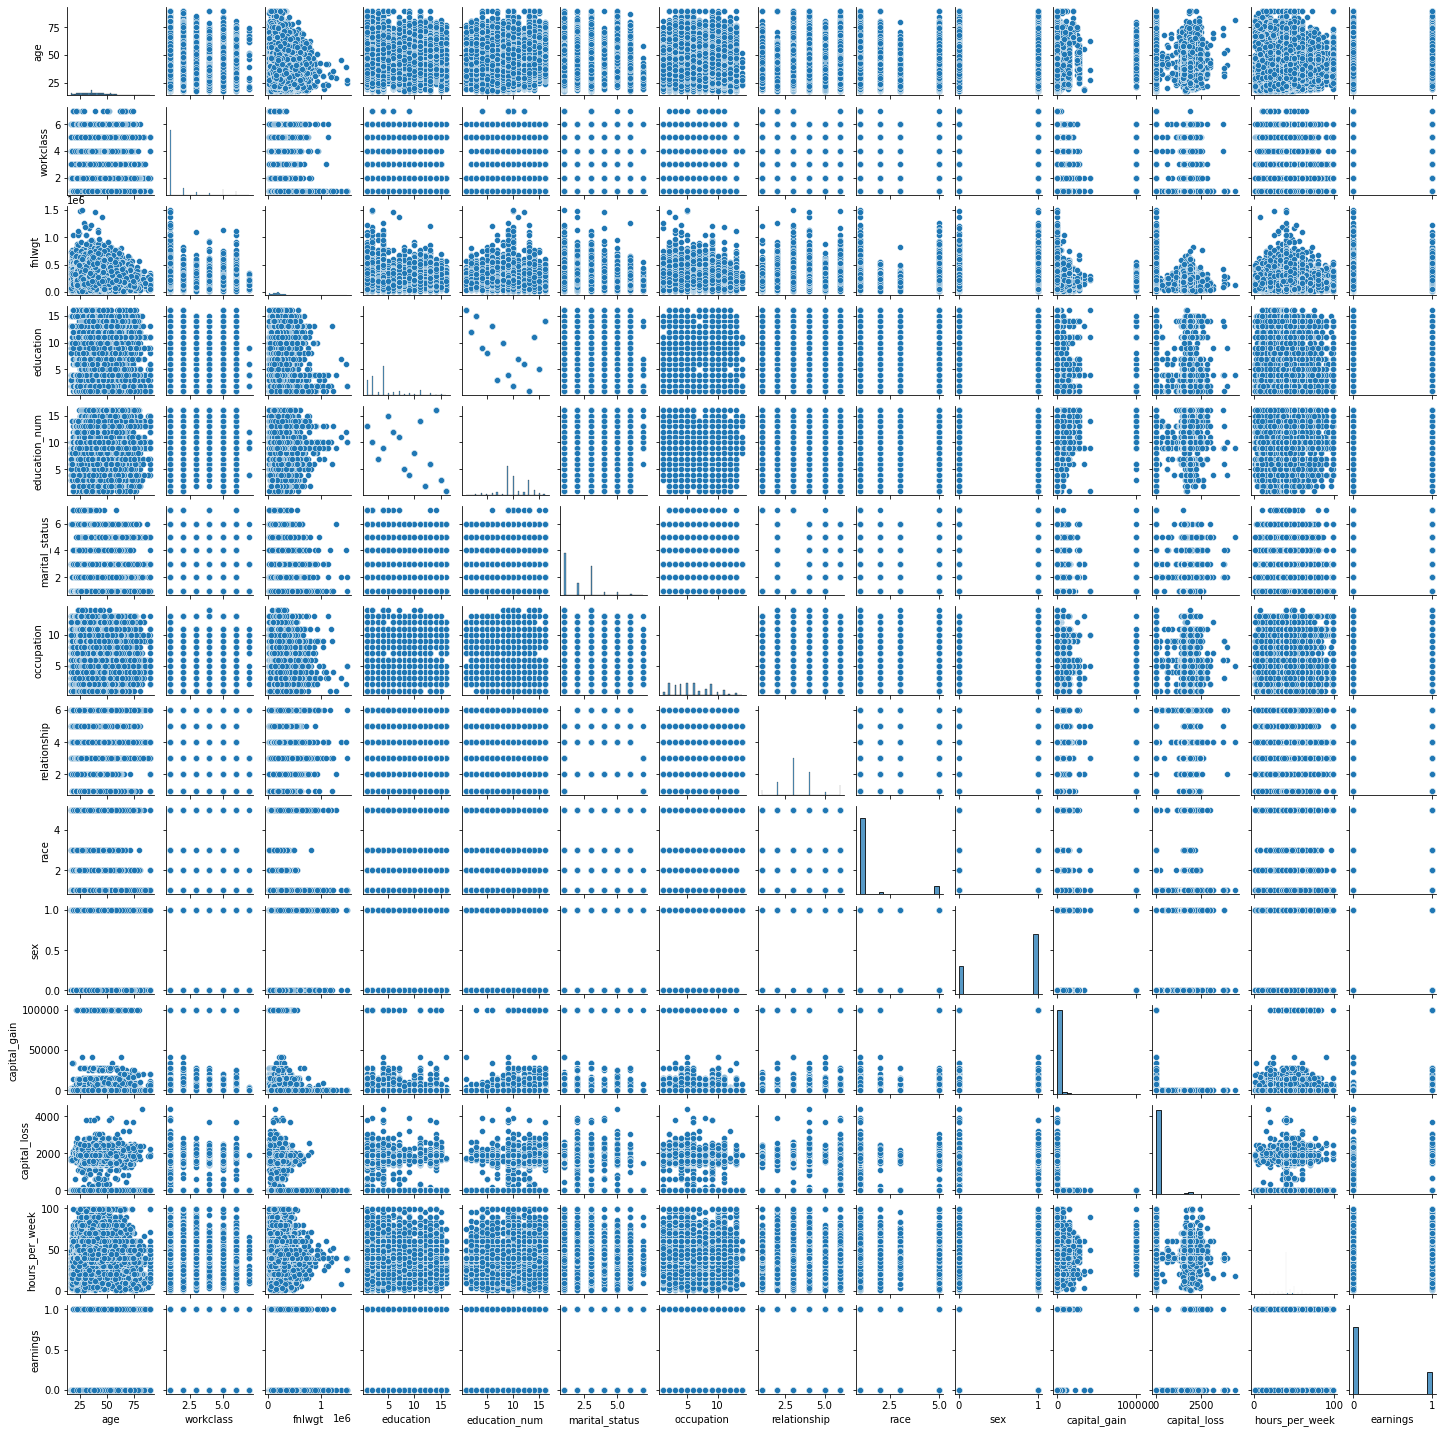

In [254]:
sns.pairplot(adult)
plt.gcf().set_size_inches(20,20)

<AxesSubplot:>

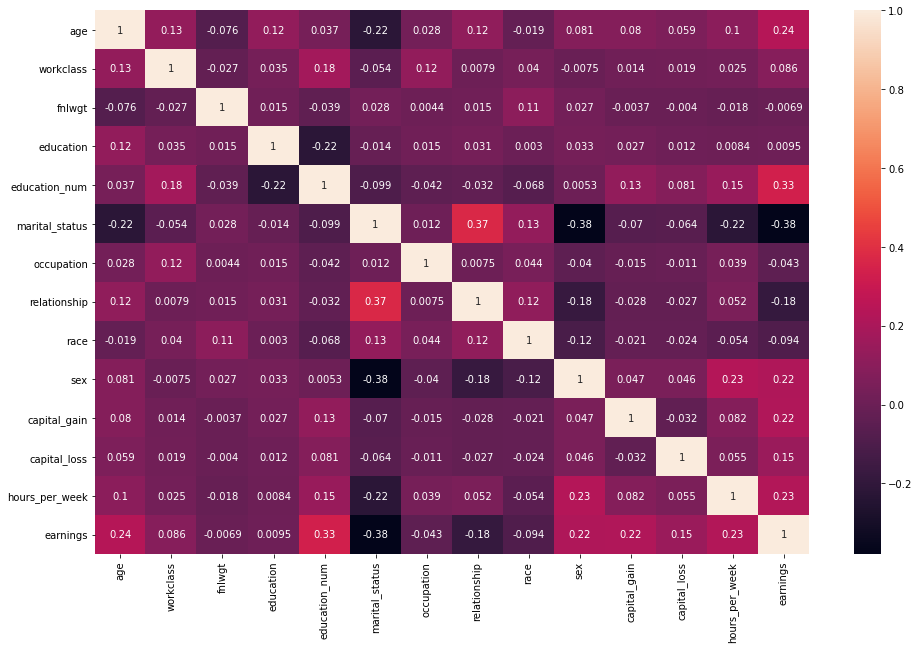

In [257]:
set_option('display.width', 100)
plt.figure(figsize=(16,10))
sns.heatmap(adult.corr(), annot=True)

# Analysing each feature against the earning (target) variable

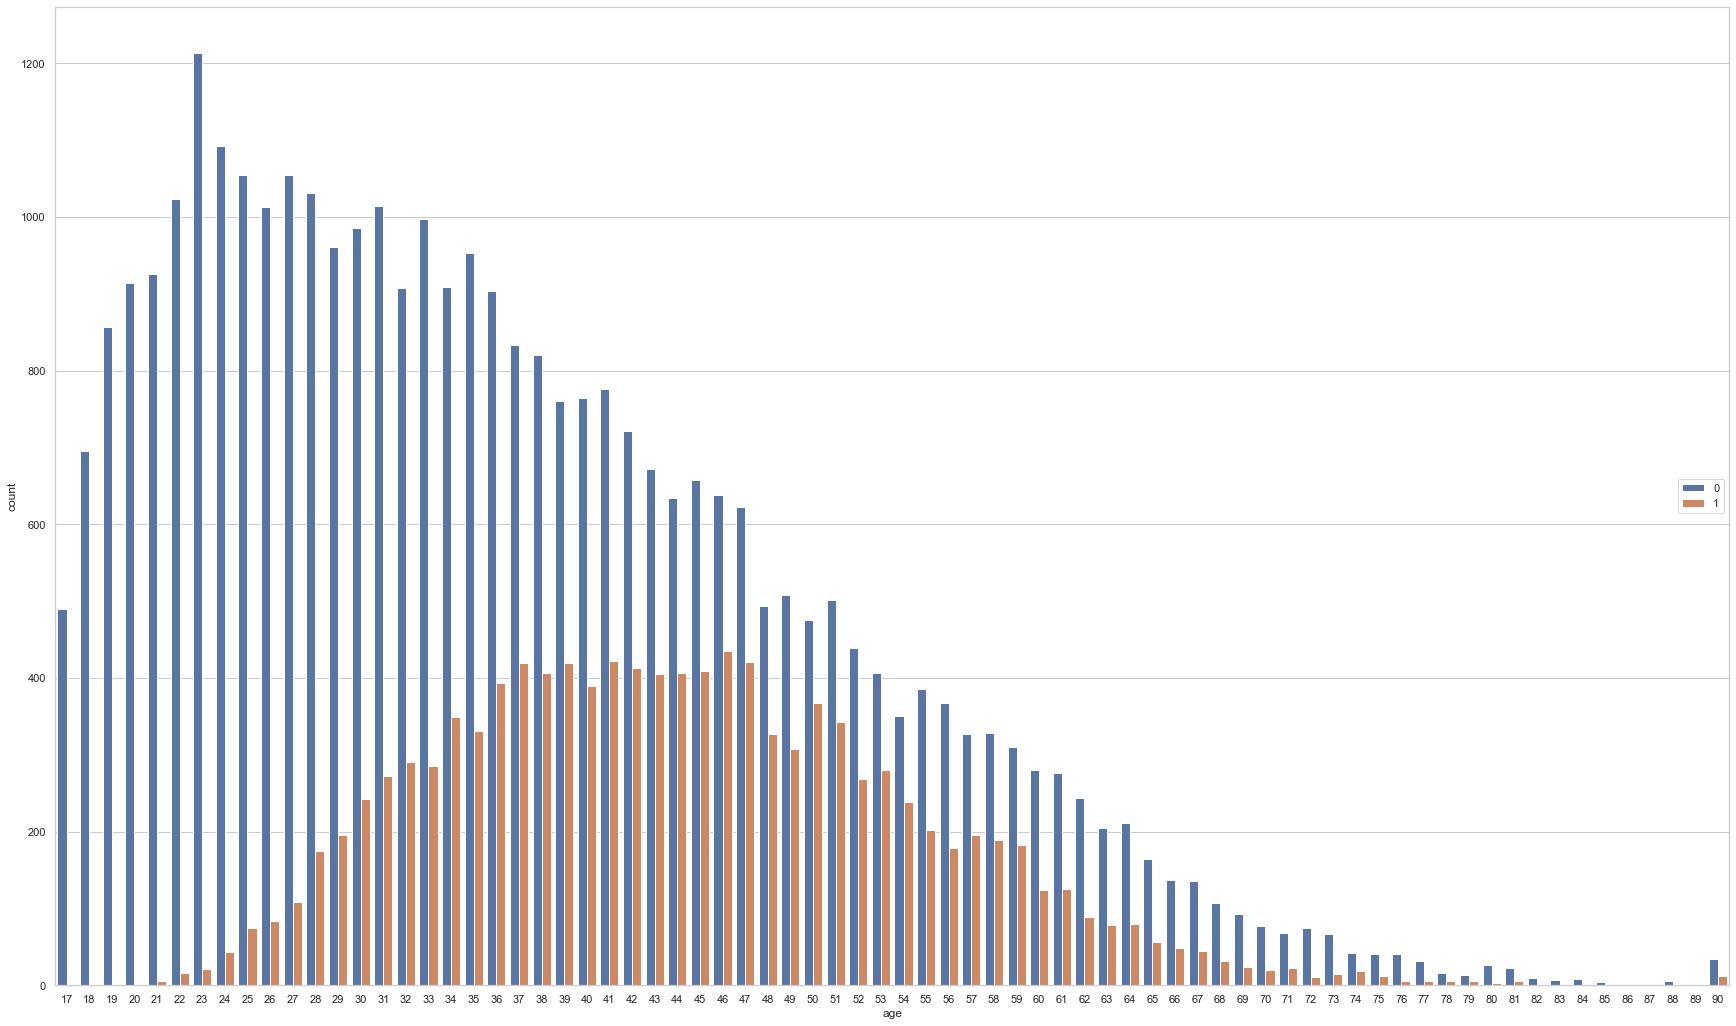

In [301]:
sns.countplot(x="age", hue="earnings", data=adult)
plt.gcf().set_size_inches(30,18)
plt.legend(loc='right')

Using a count of 200 above, people from ages 30-55 tend to earn above 50k annually at a considerable rate

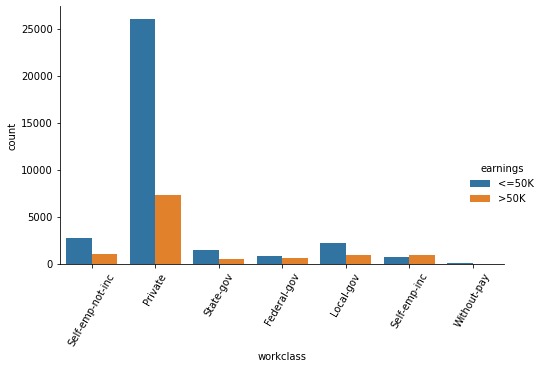

In [79]:
ax = sns.catplot(x="workclass", hue="earnings", data=adult, kind='count', aspect=3)
ax.set_xticklabels(rotation=60)
plt.gcf().set_size_inches(7,4)

Private workers earn above 50k annually better than any other workclass group

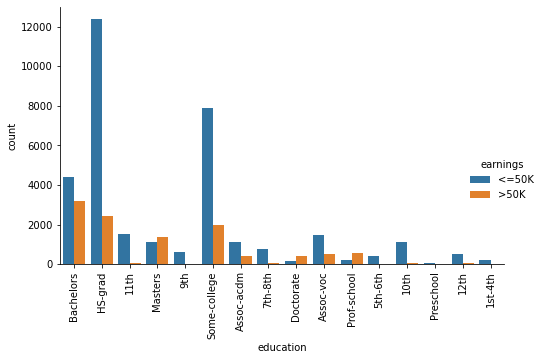

In [81]:
ax = sns.catplot(x="education", hue="earnings", data=adult, kind='count', aspect=3)
ax.set_xticklabels(rotation=90)
plt.gcf().set_size_inches(7,4)

- People who have their masters, doctorate, or professional school degrees earn a yearly income above 50k at a more efficient rate
- others who have a bachelors degree, are high school graduates, and are in college also earn above 50k, but it is not as gauranteed as the people with the degrees mentioned earlier

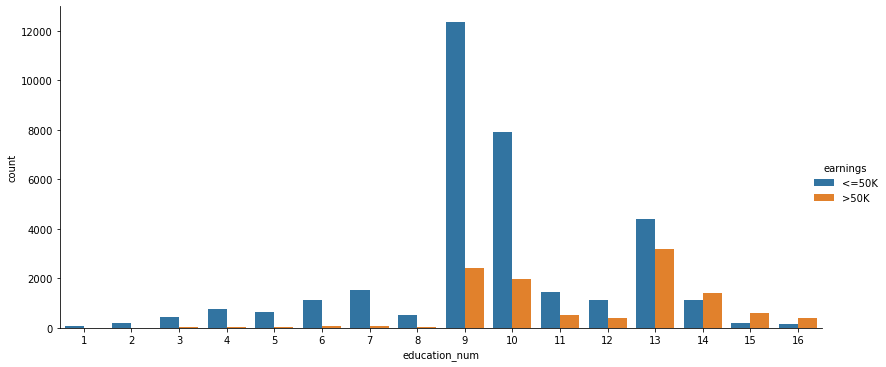

In [83]:
ax = sns.catplot(x="education_num", hue="earnings", data=adult, kind='count', aspect=3)
plt.gcf().set_size_inches(12,5)

People who have passed through at least 13 education levels earn above 50k yearly at a more efficient rate

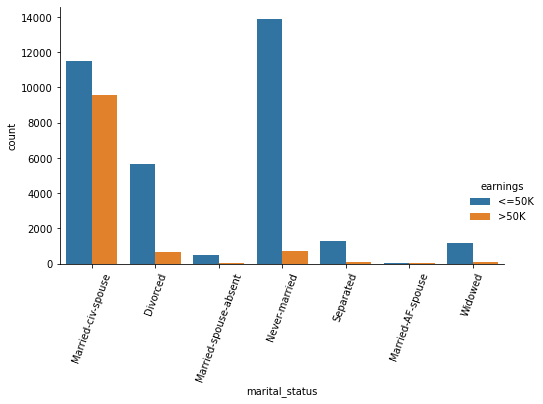

In [85]:
ax = sns.catplot(x="marital_status", hue="earnings", data=adult, kind='count', aspect=3)
ax.set_xticklabels(rotation=70)
plt.gcf().set_size_inches(7,4)

- Most of the people earning above 50k annually are married to civilian spouse
- A few people who are divorced or not married also make above 50k annually

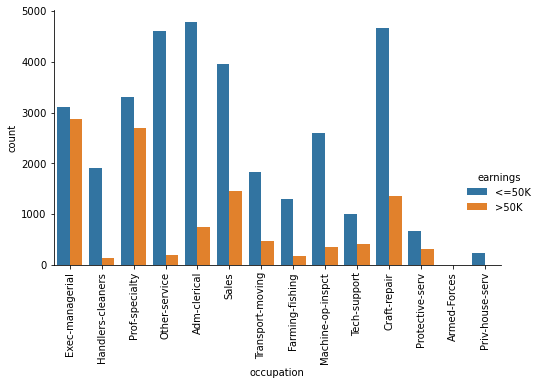

In [87]:
ax = sns.catplot(x="occupation", hue="earnings", data=adult, kind='count', aspect=3)
ax.set_xticklabels(rotation=90)
plt.gcf().set_size_inches(7,4)

- Executive managers and Professional specialists earns above 50k annually more than other occupations
- They are followed by Sales rep and craft repairers

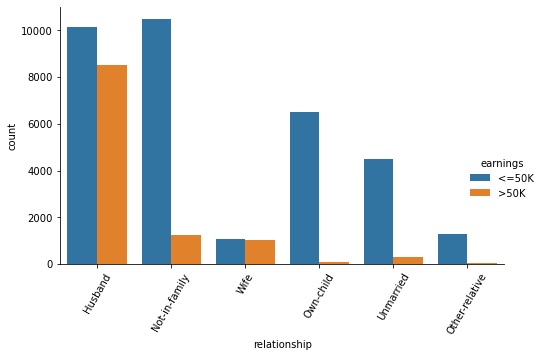

In [88]:
ax = sns.catplot(x="relationship", hue="earnings", data=adult, kind='count', aspect=3)
ax.set_xticklabels(rotation=60)
plt.gcf().set_size_inches(7,4)

- Most of the people earning above 50k a year are Husbands
- A few other people earning above 50k are either not in a family, are wives, or are unmarried

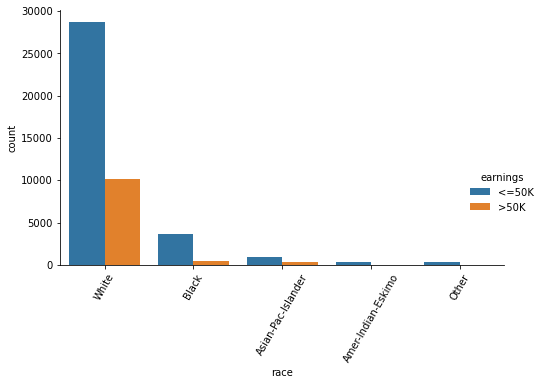

In [89]:
ax = sns.catplot(x="race", hue="earnings", data=adult, kind='count', aspect=3)
ax.set_xticklabels(rotation=60)
plt.gcf().set_size_inches(7,4)

- Almost all the people earning above 50k annually are white
- Blacks and Asian pacific islanders make up an insignificant number of people earnig above 50k

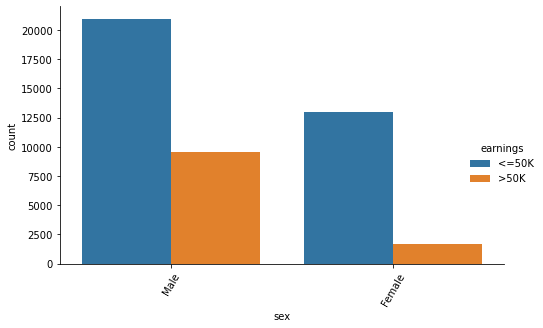

In [91]:
ax = sns.catplot(x="sex", hue="earnings", data=adult, kind='count', aspect=3)
ax.set_xticklabels(rotation=60)
plt.gcf().set_size_inches(7,4)

- Almost all the people earning 50k annually are males
- Females make up for a handful of people earning 50k annually

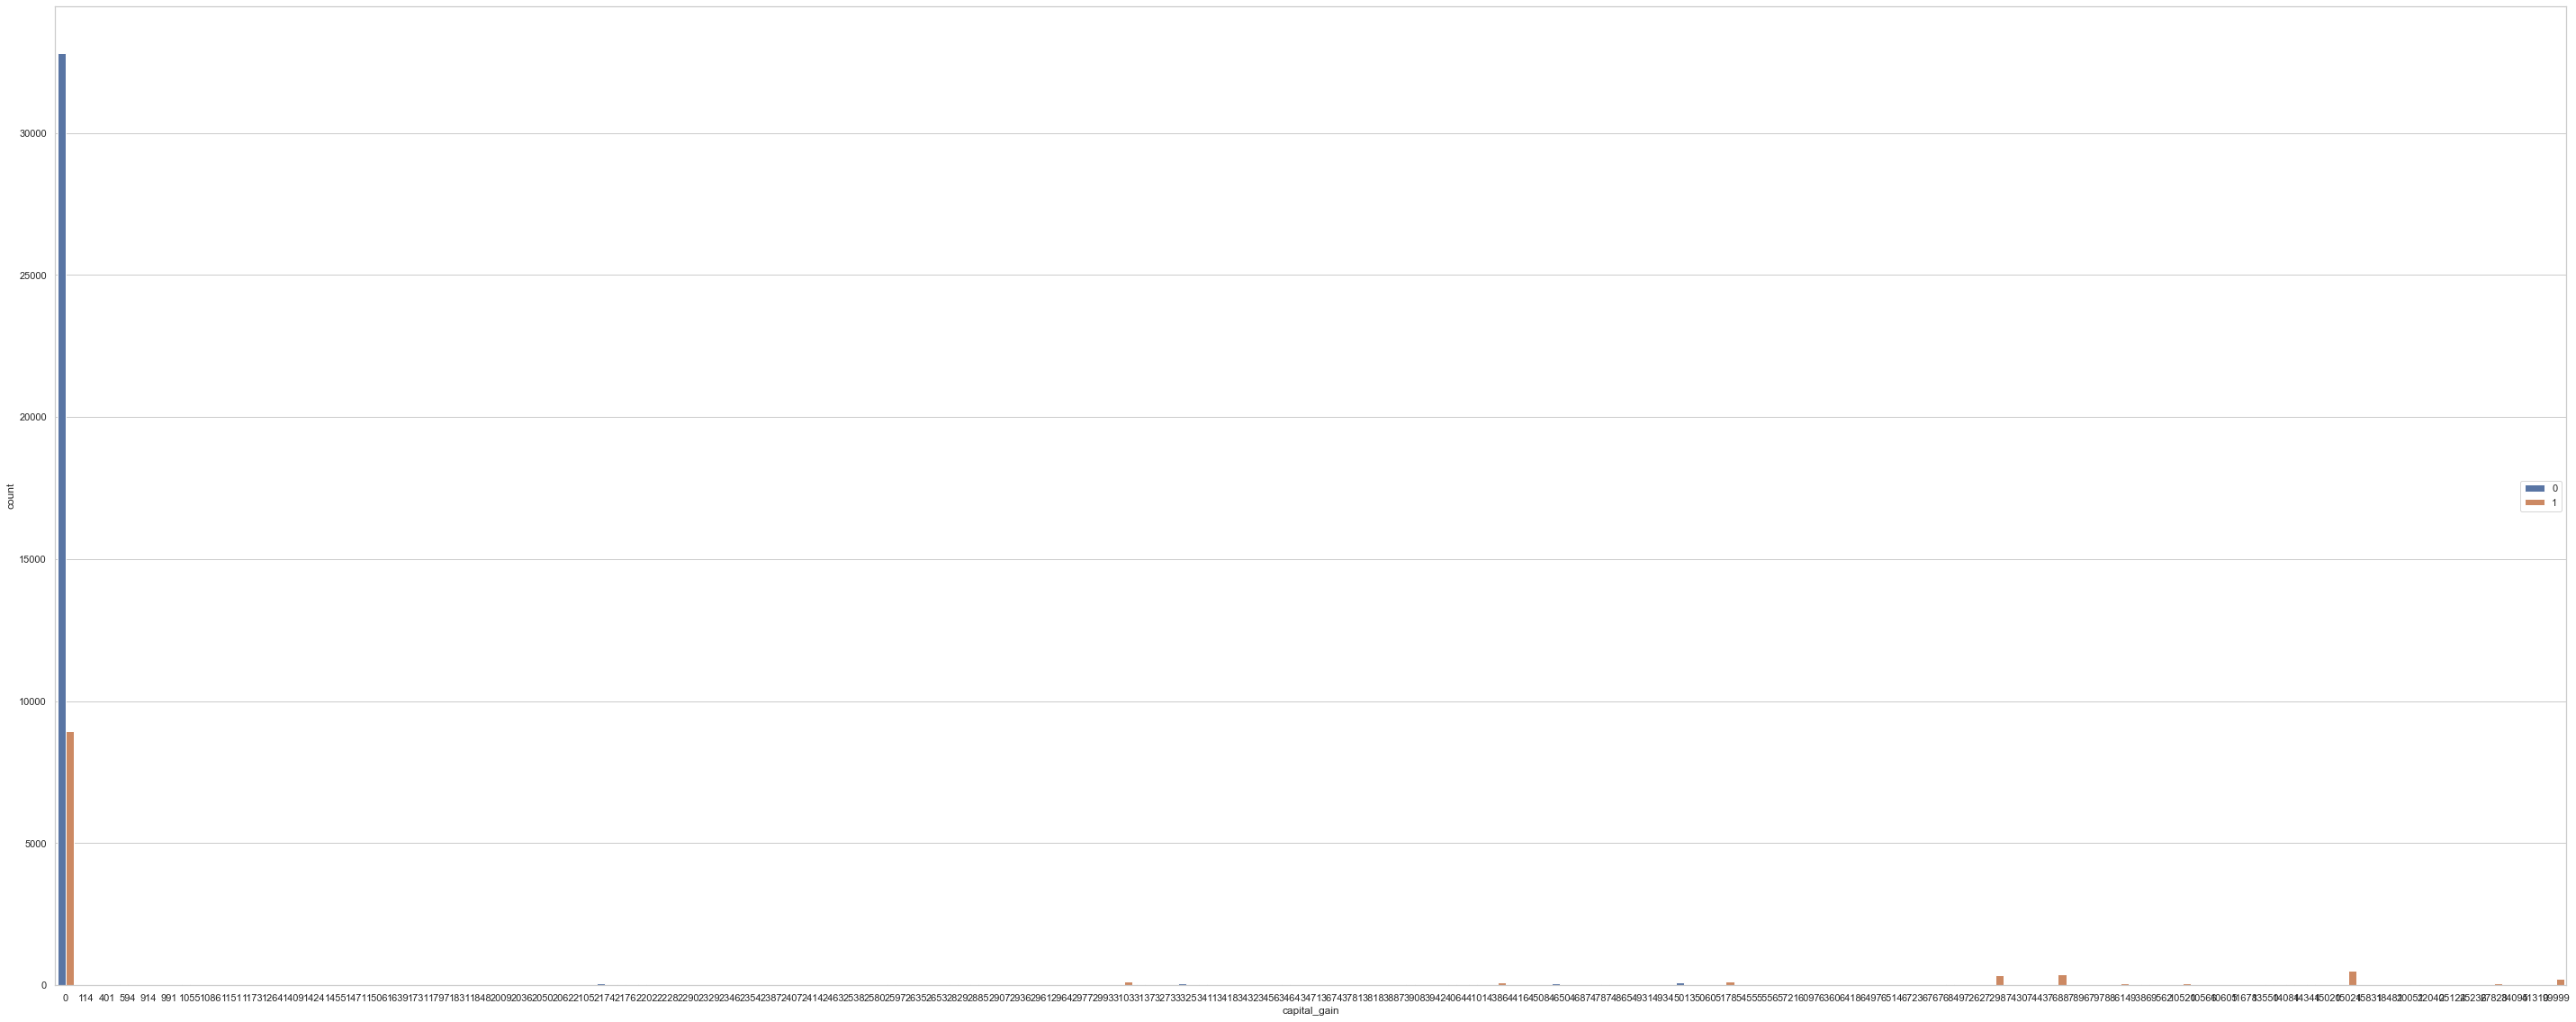

In [311]:
sns.countplot(x="capital_gain", hue="earnings", data=adult)
plt.gcf().set_size_inches(50,20)
plt.legend(loc='right')

- People who have a capital gain above 7000 anually earn 50k anually at a more efficient rate
- A good number of people with 0 capital gain also earn 50k annually

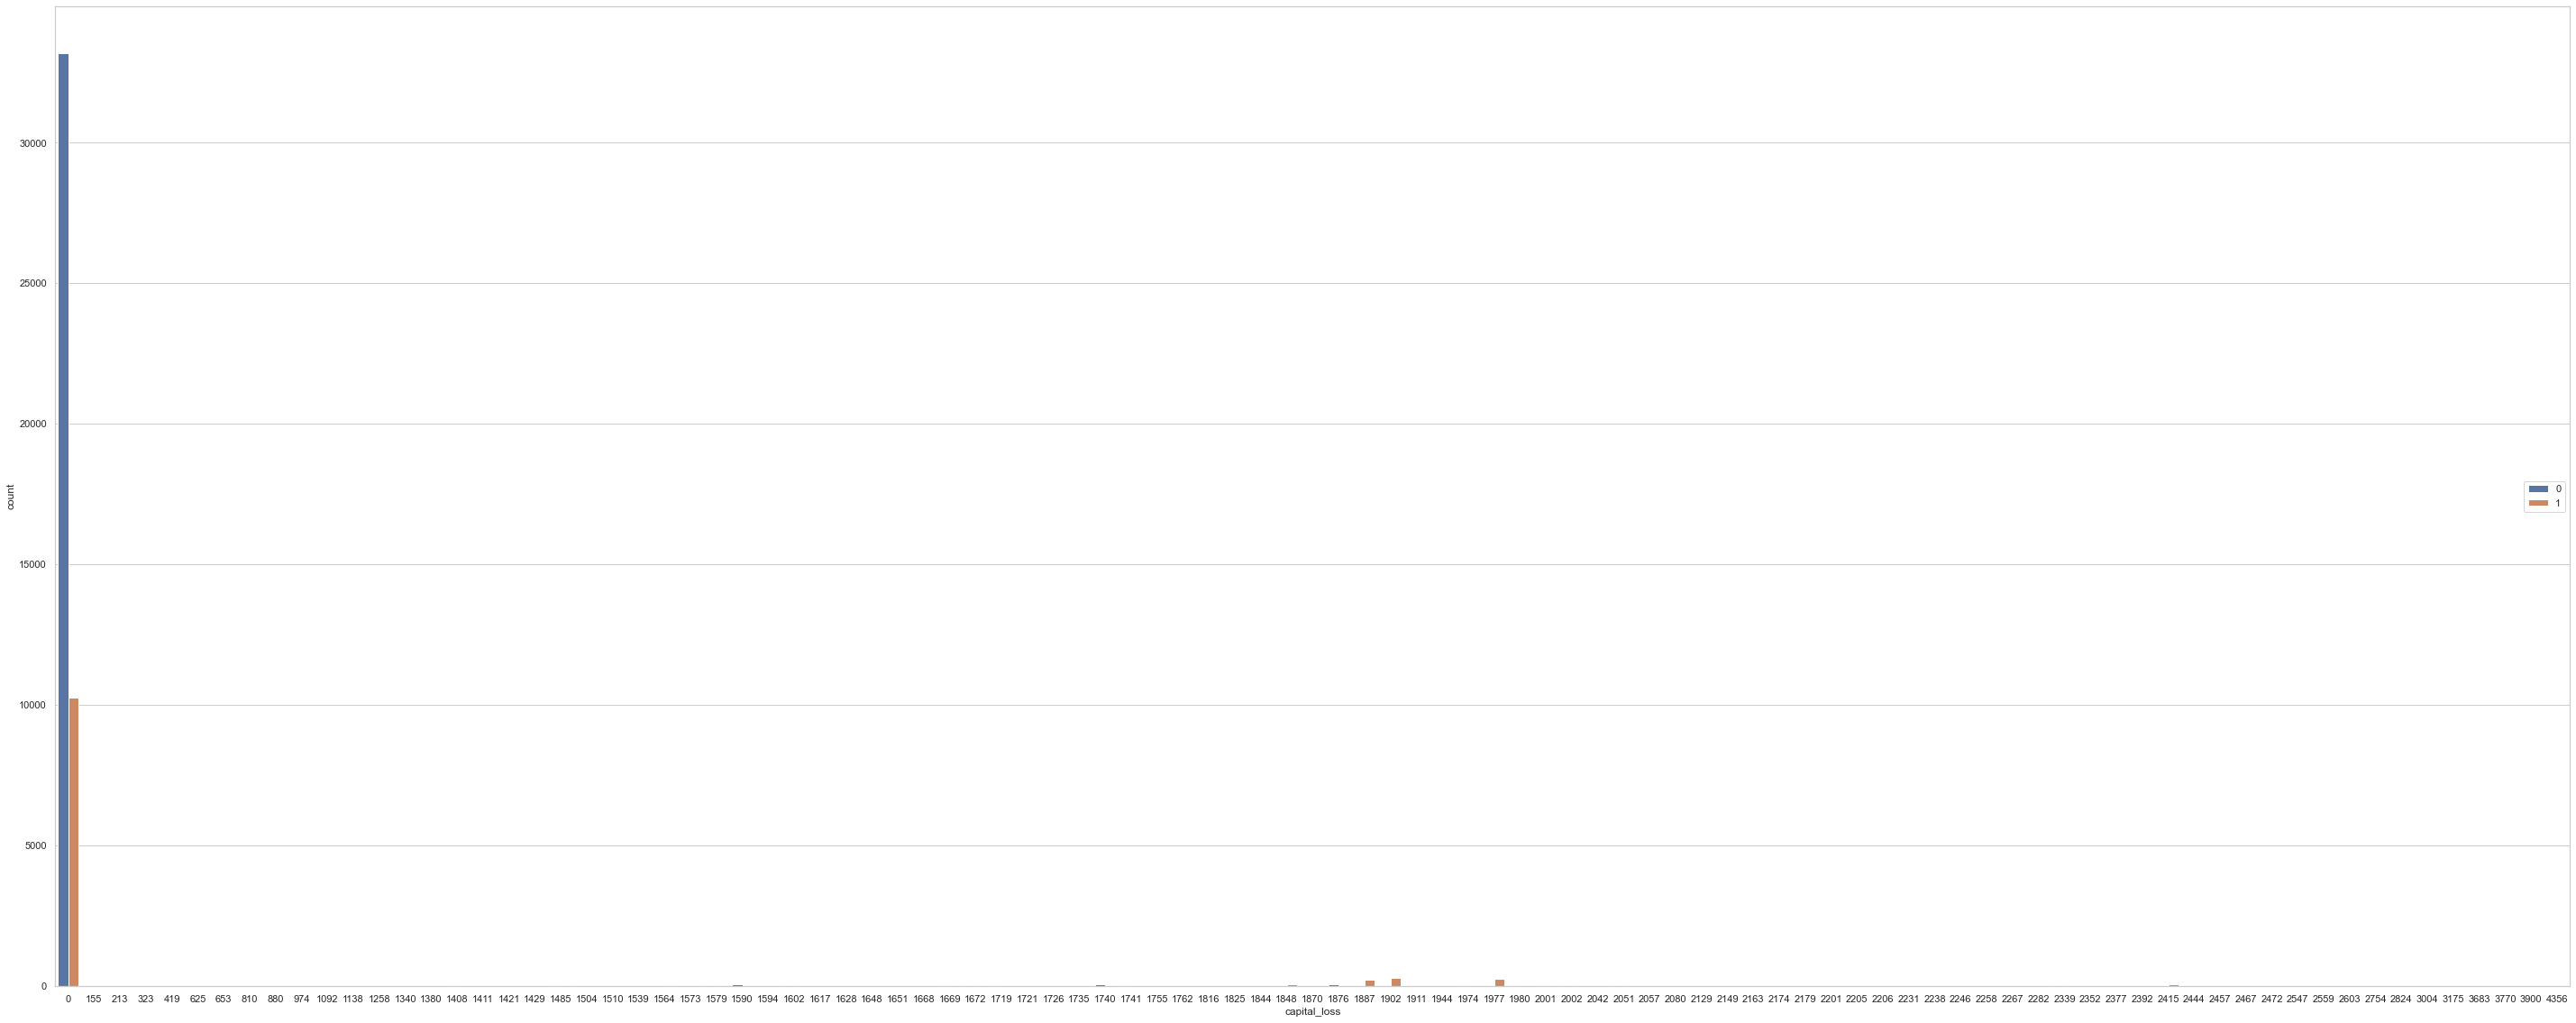

In [312]:
sns.countplot(x="capital_loss", hue="earnings", data=adult)
plt.gcf().set_size_inches(50,20)
plt.legend(loc='right')

- People who have a capital loss above 7000 anually earn 50k anually at a more efficient rate
- A good number of people with 0 capital loss also earn 50k annually

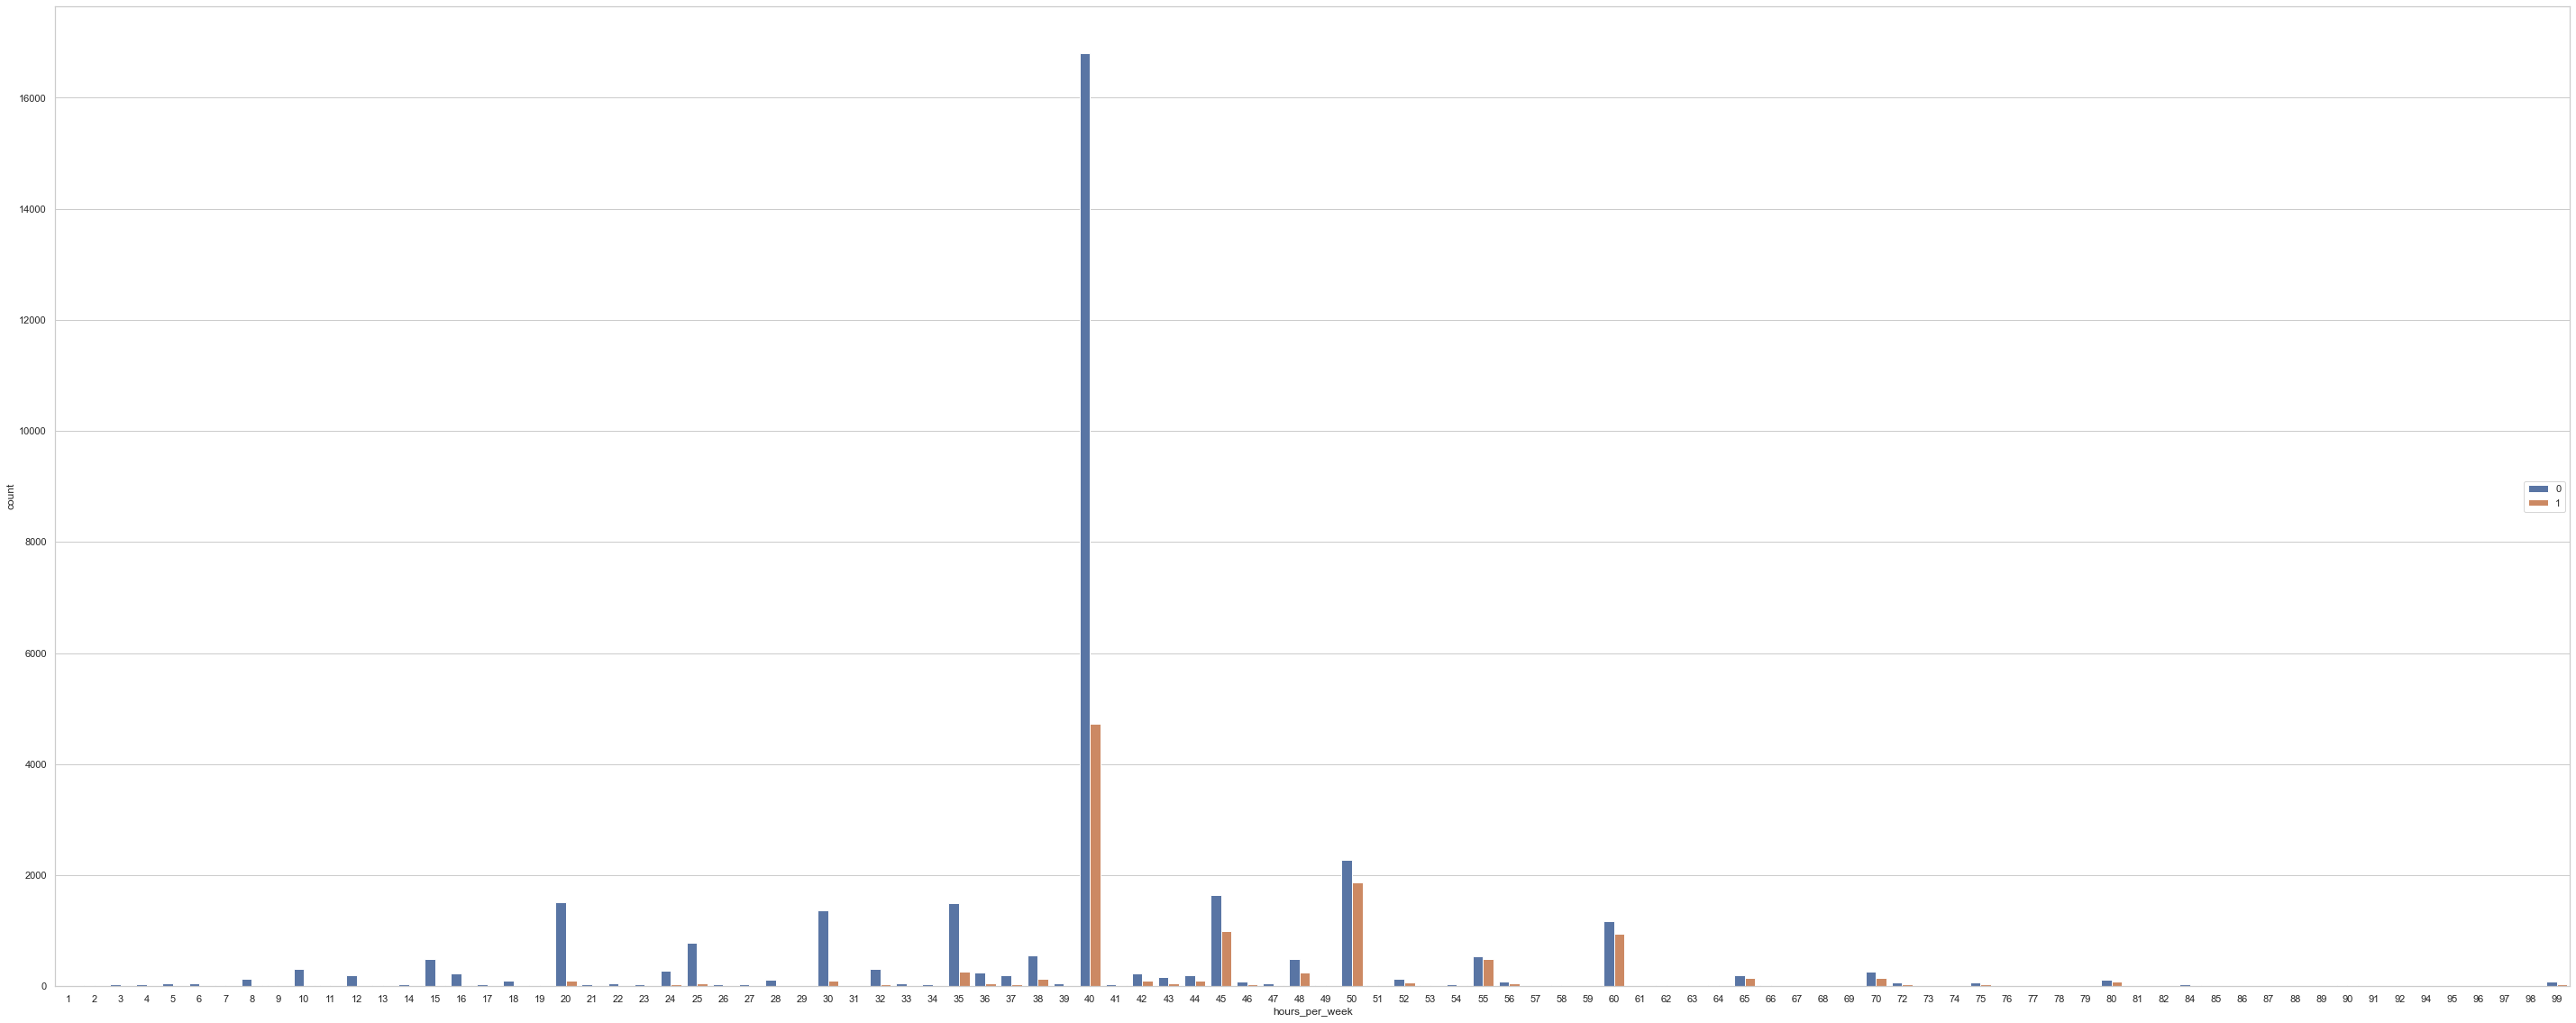

In [313]:
sns.countplot(x="hours_per_week", hue="earnings", data=adult)
plt.gcf().set_size_inches(50,20)
plt.legend(loc='right')

- People working 40 hours per week earn above 50k more than anyone
- people working 50, 60, 45, and 55 hours per week also make a considerable amount of people earning above 50k annually

# Analysing a few other features against each other

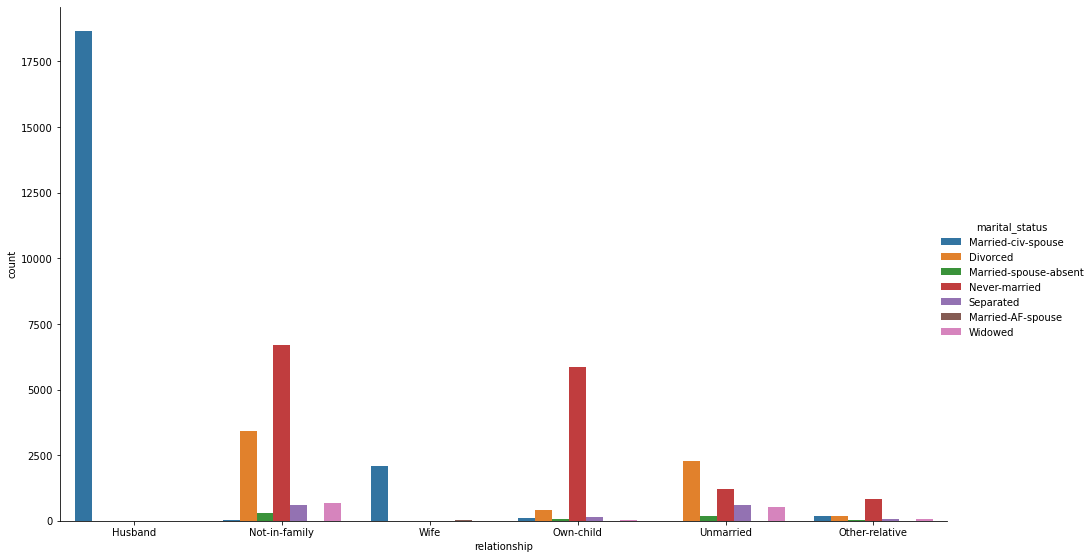

In [96]:
ax = sns.catplot(x="relationship", hue="marital_status", data=adult, kind='count', aspect=3)
plt.gcf().set_size_inches(15,8)

- All wives in the data are married to civilian spouse
- Almost all own childs in the data are not married. The rest are either married to a civilian spouse, or seperated
- All husbands in the data are married to civilian spouse
- A good number of people who are not in a family are not married or are divorced. The others are seperated, widowed, or their spouse are absent
- Most people who are other relatives are not married. The others are either married to a civilian spouse or are divorced
- A good number of people who are unmarried are either divorced or not married. The others are either seperated, widowed, or their spouse are absent

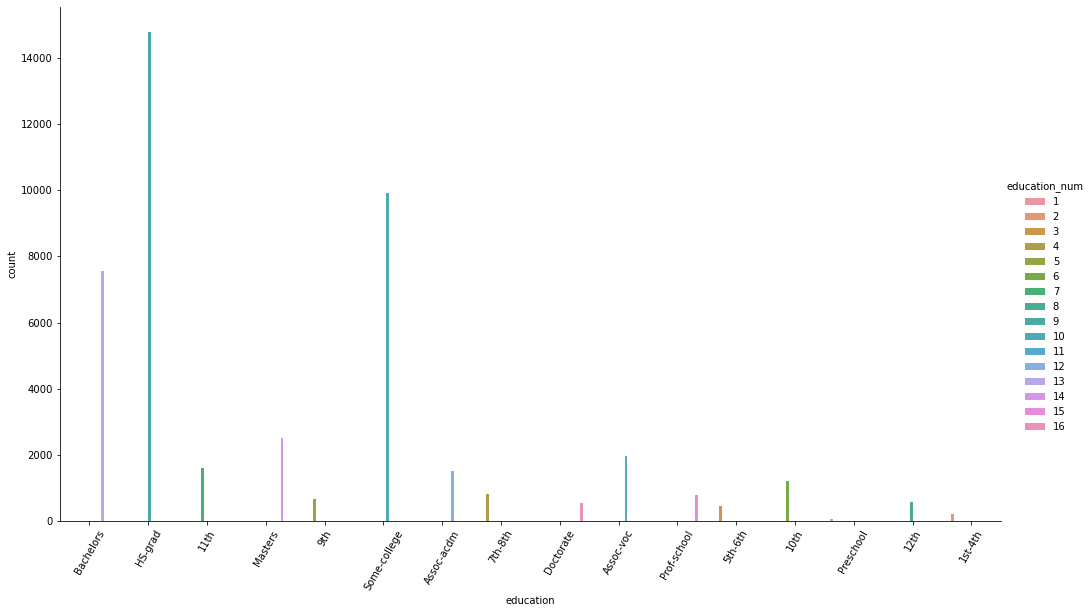

In [102]:
ax = sns.catplot(x="education", hue="education_num", data=adult, kind='count', aspect=3)
ax.set_xticklabels(rotation=60)
plt.gcf().set_size_inches(15,8)

- High school graduates have passed through at least 9 education levels 
- college degree holders have passed through at least 10 education levels
- Bachelors have passed through at least 13 education levels
- Masters have passed through 14 education levels

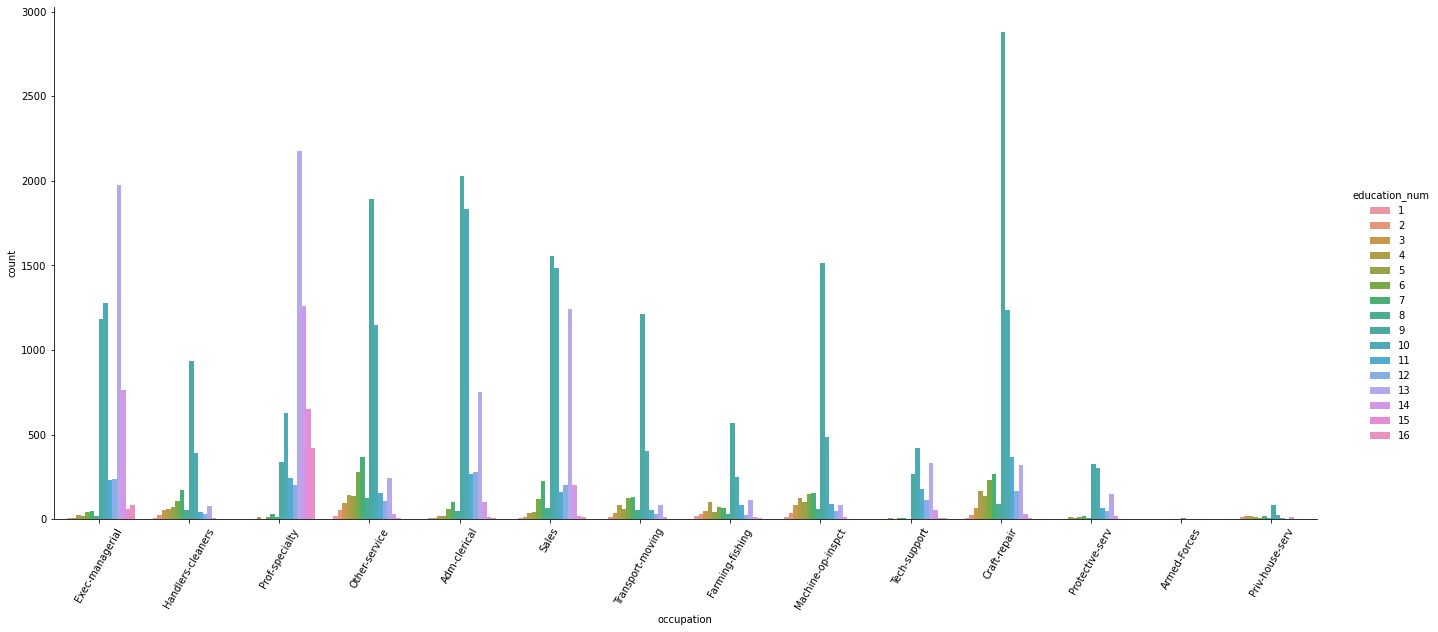

In [106]:
ax = sns.catplot(x="occupation", hue="education_num", data=adult, kind='count', aspect=3)
ax.set_xticklabels(rotation=60)
plt.gcf().set_size_inches(20,8)

- Almost all executive managers and professional specialists have acquired an education level of at least 13 and above
- Most Craft repairers and Sales reps have an education level from 9-113

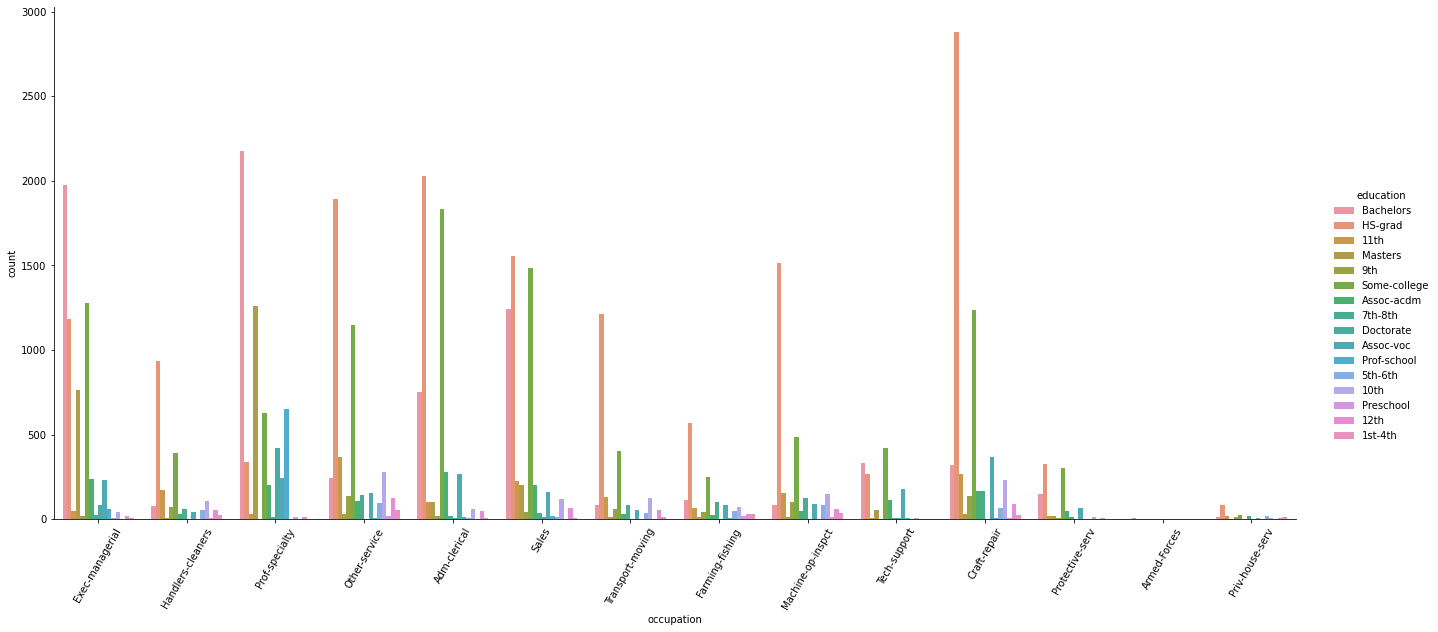

In [109]:
ax = sns.catplot(x="occupation", hue="education", data=adult, kind='count', aspect=3)
ax.set_xticklabels(rotation=60)
plt.gcf().set_size_inches(20,8)

More executive managers and professional specialists either have their masters, doctorates or professional schools degree as highest degress

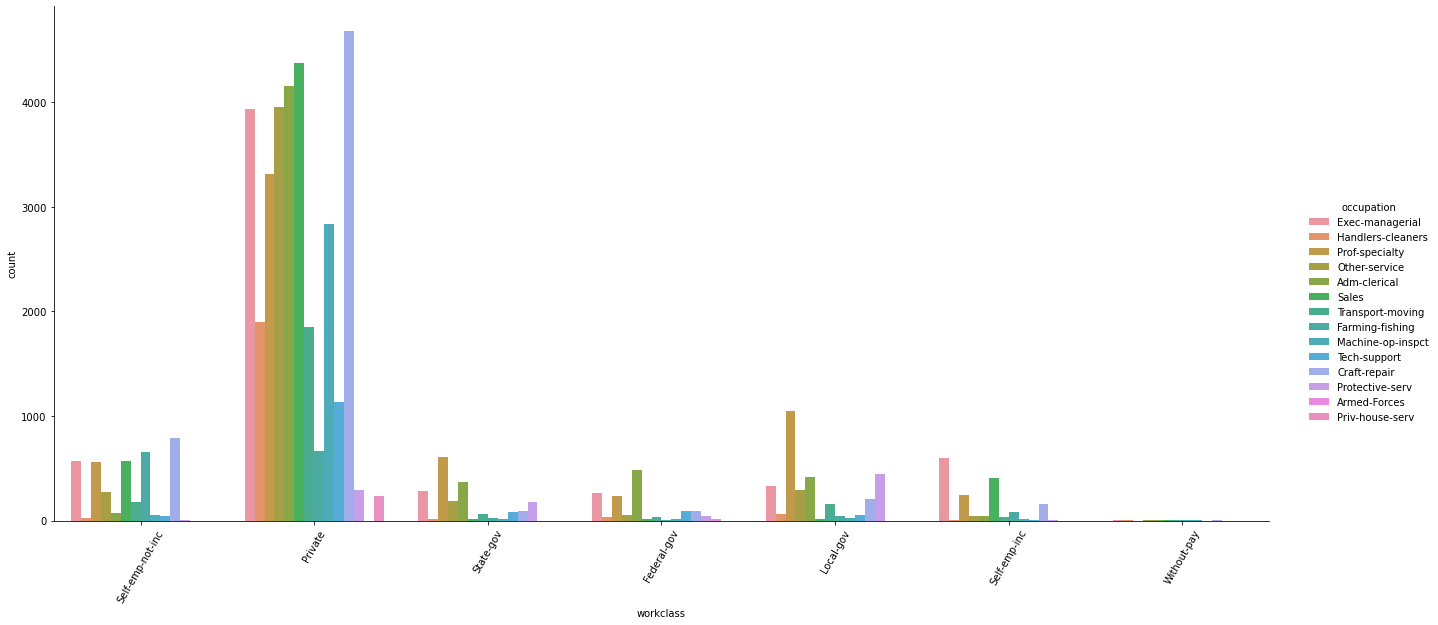

In [110]:
ax = sns.catplot(x="workclass", hue="occupation", data=adult, kind='count', aspect=3)
ax.set_xticklabels(rotation=60)
plt.gcf().set_size_inches(20,8)

A good number of craft repairers, admin clerk, sale reps, people working in other services, exec manager, and professional specialist are private workers

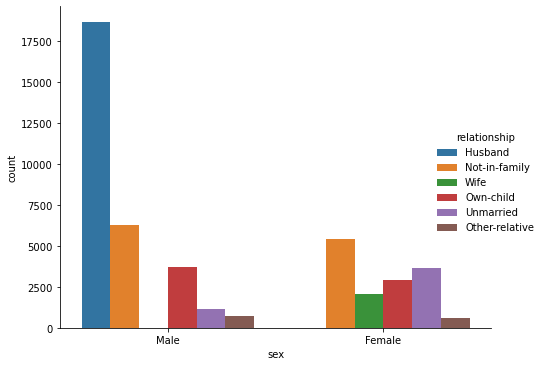

In [111]:
ax = sns.catplot(x="sex", hue="relationship", data=adult, kind='count', aspect=3)
plt.gcf().set_size_inches(7,5)

- Most of the males are husbands. while a good number are either not in a family or are own child
- Most females are not in a family, unmarried, own child, or wives

# The profile of people likely to earn above 50k annually from my analysis

They may be people with most if not all of the following;

- Executive Managers, Professional Specialist, Sales Reps, or Craft Repairers who are private workers
- Have a Masters, Doctorate, or Professional School degree with an education level of 13 and above
- Are married to a civilian spouse (especially husbands married to civilian wives)
- Are white of ages 21-81
- Makes a capital gain or loss above 0
- Works for 40-60 hours per week